In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [24]:
df = pd.read_csv("./survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [25]:
print("Data shape:")
print(df.shape)
print("Data info:")
print(df.info())

Data shape:
(309, 16)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    in

Class 0: 270
Class 1: 39
Proportion: 6.92 : 1


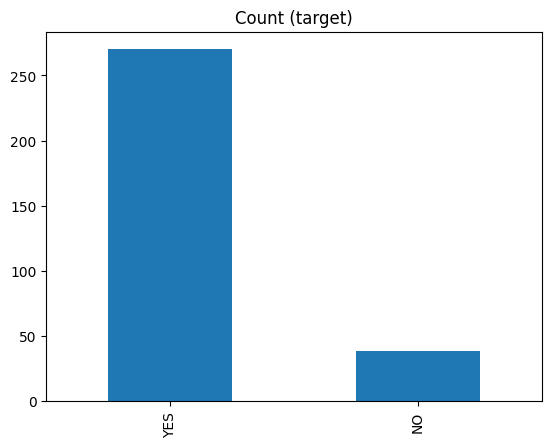

In [26]:
target_count =df['LUNG_CANCER'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# import pickle as pkl
# with open("scaler-lung-cancer.pkl", "wb") as file :
#     pkl.dump(scaler, file)

In [29]:
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [30]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [31]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [32]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,0.115087,1,1,1,0,0,0,0,0,1,0,0,1,1
336,0,2.580241,0,0,0,0,1,1,0,0,0,0,1,0,0
334,0,-0.193058,1,0,0,0,0,1,0,0,0,0,1,0,0
151,0,0.217801,1,1,0,1,1,0,0,0,0,0,0,0,0
314,1,0.628660,1,0,1,0,0,1,0,0,0,0,0,0,0


In [35]:
X_train['AGE'].shape

(357,)

In [36]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Best Parameters of SVC model is : {'gamma': 100, 'C': 100}



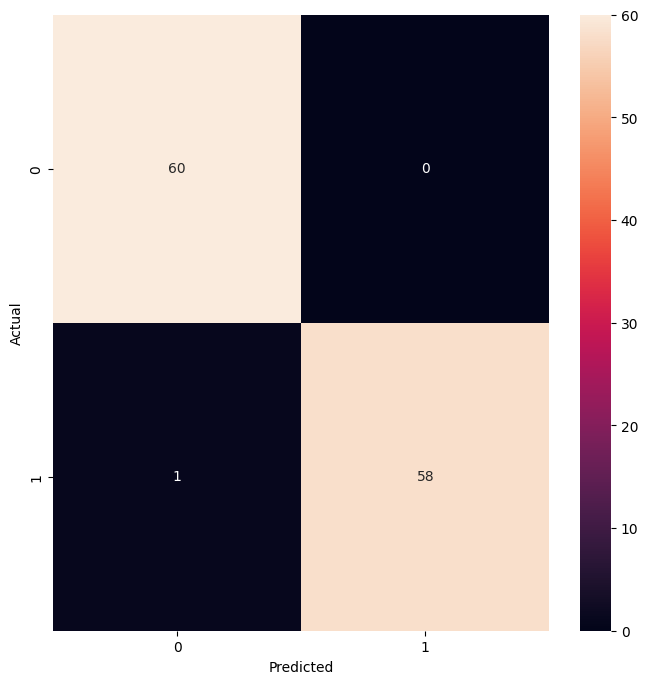

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

In [41]:
type(rcv)

sklearn.model_selection._search.RandomizedSearchCV

In [104]:
model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_uniform', input_shape=(15,)),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
     Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=None, epochs=20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1600      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21901 (85.55 KB)
Trainable params: 21901 (85.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
12/12 [==============================] - 1s 1ms/step - loss: 0.5666 - accuracy: 0.7367
Epoch 2/20
12/12 [==============================] - 

In [106]:
model.save('my_model.h5')

c:\Users\ll\anaconda3\envs\NLP\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train_numpy = X_train.values.astype(np.float32)
y_train_numpy = y_train.values.astype(np.float32).reshape(-1, 1)  

X_train_tensor = torch.from_numpy(X_train_numpy)
y_train_tensor = torch.from_numpy(y_train_numpy)

# Define your model
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.dense1 = nn.Linear(in_features=15, out_features=100)
        self.dense2 = nn.Linear(in_features=100, out_features=100)
        self.dense3 = nn.Linear(in_features=100, out_features=100)
        self.dense4 = nn.Linear(in_features=100, out_features=1)

    def forward(self, x):
        x = torch.relu(self.dense1(x))
        x = torch.relu(self.dense2(x))
        x = torch.relu(self.dense3(x))
        x = self.dense4(x)
        return x

# Instantiate the model
model = CustomModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    # Print training loss for every epoch
    if epoch%1000 == 0 :
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item()}')

Epoch [1/2000], Loss: 0.5369077920913696
Epoch [1001/2000], Loss: 0.0003870405489578843


In [102]:
model.eval()
with torch.no_grad():
    val_outputs = model(torch.from_numpy(X_test.values.astype(np.float32)))
    val_loss = criterion(val_outputs, torch.from_numpy(y_test.values.astype(np.float32)))
    print(f'Validation Loss: {val_loss.item()}')

Validation Loss: 0.49544548988342285


In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(15, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Instantiate the model with a specified dropout rate
model = Net(dropout_rate=0.8)


print(model)


optimizer = optim.Adam(model.parameters(), lr=0.0003)  
loss_function = nn.BCELoss()  


X_train_numpy = X_train.values.astype(np.float32)
y_train_numpy = y_train.values.astype(np.float32).reshape(-1, 1)  

X_train_tensor = torch.from_numpy(X_train_numpy)
y_train_tensor = torch.from_numpy(y_train_numpy)

# Train the model
for epoch in range(20000): 
    optimizer.zero_grad()  
    outputs = model(X_train_tensor)  
    loss = loss_function(outputs, y_train_tensor.view(-1, 1)) 
    loss.backward()  
    optimizer.step()  

    # Print statistics
    if epoch%1000 == 0 :
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Net(
  (fc1): Linear(in_features=15, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.8, inplace=False)
)
Epoch 1, Loss: 0.7001411318778992
Epoch 1001, Loss: 0.19467408955097198
Epoch 2001, Loss: 0.11008812487125397
Epoch 3001, Loss: 0.05564657598733902
Epoch 4001, Loss: 0.036418404430150986
Epoch 5001, Loss: 0.02806307189166546
Epoch 6001, Loss: 0.022660784423351288
Epoch 7001, Loss: 0.037886545062065125
Epoch 8001, Loss: 0.021440528333187103
Epoch 9001, Loss: 0.017387527972459793
Epoch 10001, Loss: 0.02095540426671505
Epoch 11001, Loss: 0.039782263338565826
Epoch 12001, Loss: 0.020313212648034096
Epoch 13001, Loss: 0.022111091762781143
Epoch 14001, Loss: 0.03463137894868851
Epoch 15001, Loss: 0.035774488002061844
Epoch 16001, Loss: 0.02599029615521431
Epoch 17001, Loss: 0.024075563997030258
Epoch 1

In [78]:
y_train[5]

1

In [103]:
model(torch.from_numpy(X_test.values.astype(np.float32)))

tensor([[-2.2825e-02],
        [-2.6471e-01],
        [ 7.0972e-01],
        [ 9.8475e-01],
        [-3.5548e-01],
        [ 1.0544e+00],
        [ 9.6718e-01],
        [ 5.6420e-01],
        [ 9.9567e-01],
        [ 9.1346e-01],
        [ 1.0092e+00],
        [ 3.1310e-04],
        [ 7.4600e-04],
        [ 8.2314e-01],
        [ 1.0790e+00],
        [ 1.6738e-03],
        [ 1.0512e+00],
        [ 9.8021e-04],
        [ 1.3142e-03],
        [ 1.2555e+00],
        [ 9.3115e-01],
        [ 1.0861e+00],
        [ 1.5369e-03],
        [ 9.7688e-01],
        [ 2.1425e-03],
        [ 9.8021e-04],
        [ 1.0212e-03],
        [ 1.5369e-03],
        [ 1.3401e-03],
        [ 1.4966e-03],
        [ 9.2436e-01],
        [ 1.0253e-03],
        [ 9.4863e-01],
        [ 9.6970e-01],
        [ 1.0739e-03],
        [ 1.3912e-03],
        [ 1.3214e+00],
        [ 1.6545e-03],
        [ 1.0253e-03],
        [ 4.0217e-01],
        [ 1.3142e-03],
        [ 1.3454e-03],
        [ 1.0181e+00],
        [ 1

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9328

Test accuracy: 0.9327731132507324


In [28]:
model

In [30]:
model.save('lung-cancer.keras')

In [59]:
type(X_test)

pandas.core.frame.DataFrame

## Inference

In [3]:
from keras.models import load_model

model_cancer = load_model('lung-cancer.keras')

In [85]:
my_values = '''
{
  "GENDER": "0",
  "AGE": "-0.086017",
  "SMOKING": "0",
  "YELLOW_FINGERS": "0",
  "ANXIETY": "0",
  "PEER_PRESSURE": "0",
  "CHRONIC DISEASE": "1",
  "FATIGUE": "1",
  "ALLERGY": "0",
  "WHEEZING": "0",
  "ALCOHOL CONSUMING": "0",
  "COUGHING": "1",
  "SHORTNESS OF BREATH": "0",
  "SWALLOWING DIFFICULTY": "0",
  "CHEST PAIN": "0"
}
'''

In [43]:
import json
question_lung = json.load(open('../Symptom_Checker_Website/data/lung_question.json', 'r'))

In [14]:
answers = {key: None for key in question_lung.keys()}

In [15]:
answers

{'Gender': None,
 'Age': None,
 'Smoking': None,
 'Yellow fingers': None,
 'Anxiety': None,
 'Peer pressure': None,
 'Chronic Disease': None,
 'Fatigue': None,
 'Allergy': None,
 'Wheezing': None,
 'Alcohol': None,
 'Coughing': None,
 'Shortness of Breath': None,
 'Swallowing Difficulty': None,
 'Chest pain': None,
 'Lung Cancer': None}

In [86]:
import json
import numpy as np

data_dict = json.loads(my_values)
values = [float(value) for value in data_dict.values()]
numpy_array = np.array(values)

print(numpy_array)

[ 0.       -0.086017  0.        0.        0.        0.        1.
  1.        0.        0.        0.        1.        0.        0.
  0.      ]


In [87]:
model(torch.from_numpy(numpy_array.astype(np.float32)))

tensor([1.], grad_fn=<SigmoidBackward0>)

In [71]:
print(f"Can has a chance to be lung cancer at {model_cancer.predict(numpy_array.reshape(1,-1)).item()*100:.2f} percent")

1/1 [==============================] - 0s 16ms/step
Can has a chance to be lung cancer at 90.55 percent


In [31]:
type(numpy_array)

numpy.ndarray

In [32]:
X_test.values

array([[ 0.        , -0.08601674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -1.38812179,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.62856051,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        ,  0.89056204,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.89056204,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.78205329,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [36]:
jj

array([[0.        ],
       [2.73521085],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ]])

In [ ]:
jj = jj.reshape(-1, 1)

In [ ]:
jj[1]

In [ ]:
jj[1] = scaler.transform(jj[1].reshape(-1, 1))

In [ ]:
jj

In [38]:
sample = a[0]
sample = sample.reshape(-1, 1)

In [39]:
sample

array([[ 0.],
       [12.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]])

In [23]:
model.predict(numpy_array.reshape(1,-1)).round()

1/1 [==============================] - 0s 47ms/step


array([[0.]], dtype=float32)

In [40]:
result = model.predict(sample.reshape(1,-1)).round()

1/1 [==============================] - 0s 60ms/step


In [87]:
"yes" if model.predict(sample.reshape(1, -1)).round() == 1 else "no"

1/1 [==============================] - 0s 15ms/step


'no'

In [91]:
jb = lambda sample : "yes" if model.predict(sample.reshape(1, -1)).round() == 1 else "no"